In [1]:
import numpy as np
import random
%matplotlib inline
import matplotlib.pyplot as plt

# Temporal Difference Learning

Temporal difference learning illustreert de rol van tijd en geheugen in het koppelen van CS and US. Het is een simpele uitbreiding van het Rescorla Wagner model en vormt tot op de dag van vandaag de basis van zeer sterke reinforcement learning algoritmes.

Details over het TD model zijn terug te vinden in de college slides, het hoofdstuk van Gureckis & Love [**computational reinforcement learning**](http://bradlove.org/papers/GureckisLovePress.pdf) en voor meer verdieping in het online boek van [**Sutton & Barto**](http://incompleteideas.net/book/bookdraft2018jan1.pdf) en dan met name hoofdstuk 6 en 12.

Het leren in deze opdracht speelt zich af in een simpel **Markov Reward Process** met de volgende structuur:

![](random_walk.png)


De robot start elke episode in $C$, en gooit dan telkens een muntje op om te bepalen welke kant hij op gaat (kop = links, munt = rechts, beiden 50% kans). Zodra de robot een van de vierkanten eindpunten bereikt is de episode over en begint de robot weer bij punt $C$. Als de robot in het rechter eindpunt eindigt krijgt hij 1 punt, alle andere beloningen zijn nul.

## Het TD-model

In het begin van het experiment heeft de robot geen enkele kennis van de wereld en geen enkele verwachtingen voor elke staat: $$V(A)=V(B)=V(C)=V(D)=V(E)= 0$$

### Q1.a  (7 punten)

Schrijf de TD functie op die de nieuwe waarde V uitrekent nadat de robot een stap heeft verzet. Welke vrije variabelen heeft deze functie? Denk er aan dat tijd een factor speelt (dus dat je de tijdsindicatoren t  en t+1 correct hebt staan, zie college slides)

In [2]:
def TD(alpha, gamma, Vs, Vs1, r):
    Vs += alpha*(r + gamma*Vs1 - Vs)
    return Vs


![](random_walk_reward.png)

### Q1.b (7 punten)

In het begin is de verwachte waarde van staat E nul ($V(E)=0$), nu schuift de robot voor het eerst een keer toevallig naar rechts en verdient $1$ punt. Wat is hierna de verwachte waarde $V(E)$, gegeven $\alpha = .1$ en $\gamma =1$? En voor $\alpha = 0.6$ en $γ =1$?

In [3]:
Ve01 = TD(0.1, 1, 0, 0, 1)
Ve06 = TD(0.6, 1, 0, 0, 1)
print(f"alpha 0.1: {Ve01}")
print(f"alpha 0.6: {Ve06}")

alpha 0.1: 0.1
alpha 0.6: 0.6


### Q1.c (9 punten)

Schrijf een functie `td_zero` die als input, alpha ($\alpha$) , gamma ($\gamma$) en het aantal episodes accepteert. De output van deze functie moet een lijst met (V)alues zijn voor elke staat (A t/m E) in de wereld van de robot na het leren van # episodes.

* initieer de staat van de wereld:
    * Er zijn 7 states (5 letters & 2 endpoints), voor alle $V_{t=0} = 0$
* Creëer een `for loop` over alle episodes
    * Elke episode begint in C
* In elke episode blijf lopen tot je een van de eindpunten bereikt
    * Gooi muntje op en maak een stap
    * Kijk wat je beloning is na maken van stap en update $V_{t}$
    * Eindpunt bereikt? Nieuwe episode, zo niet weer muntje opgooien
    
Laat me behulp van deze functie de robot 100 episodes leren over deze wereld. Hoe zien zijn verwachtingen er uit gegeven $\alpha=0.1$ en $\gamma=1$? En voor $\alpha=0.1$ en $\gamma=1$?


In [4]:
import random



def td_zero(alpha, gamma, ep):
    values = [[0], [0, (0,0)], [0, (0,0)], [0, (0,0)], [0, (0,0)], [0, (0,1)], [0]]
    index = 3
    
    while ep > 0:
        a = random.random()
        if a < 0.5:
            values[index][0] = TD(alpha, gamma, values[index][0], values[index - 1][0], values[index][1][0])
            index -= 1
        else:
            values[index][0] = TD(alpha, gamma, values[index][0], values[index + 1][0], values[index][1][1])
            index += 1
        if (index == 0) or (index == len(values) - 1):
            index = 3
            ep -= 1
    return [x[0] for x in values[1:-1]]
            
print(f"Expectations alpha 0.1:\n{td_zero(0.1, 1, 100)}")
print(f"Expectations alpha 0.6:\n{td_zero(0.6, 1, 100)}")

Expectations alpha 0.1:
[0.11896259502728616, 0.26781224753948357, 0.4460300360757507, 0.6601877506760673, 0.8562564729342969]
Expectations alpha 0.6:
[0.00603394040822915, 0.17461951808477283, 0.7224501346964289, 0.9211870279299099, 0.968607816830159]


## MSE

Nu willen we weten hoe goed deze waardes die de robot toekent overeenkomen met de werkelijke staat van de wereld. Analytisch kan men bepalen dat de verwachte waarden 

$$ V(A)=\frac{1}{6}\ ,\ V(B)=\frac{2}{6}\ ,\ V(C)=\frac{3}{6}\ ,\ V(D)=\frac{4}{6}\ ,\ V(E)=\frac{5}{6}$$

moeten zijn als de robot voor altijd in dit universum zou ronddolen. 

Net als bij de functies die we eerder geschat hebben, beoordelen we deze leeruitkomsten niet op basis van absolute verschillen maar op basis van mean squared error ($MSE$). De error is in dit geval dus het verschil tussen de verwachte waarde van een staat volgens de robot, en de analytisch-verwachte waarde. Gebruikmakende van de eerdere $MSE$ functie, kunnen we onderzoeken welke parameter waardes voor $\alpha$ en $\gamma$ het snelst het dichts bij de waarheid komen.

### Q2.a  (7 punten)

Schrijf nu een loop die de `td_zero` functie meerdere keren aanroept, elke keer met een ander aantal episodes, en bereken de $MSE$ met het analystische resultaat, zodat je de veranderingen in $MSE$ per episode kan volgen. Zo kan je verschillende leercurves met elkaar vergelijken, de robot leert elke episode de verwachte waarde van een staat beter kennen, dus de $MSE$ moet steeds kleiner worden.

Plot de leercurves voor $\alpha = 0.7$ en $\alpha = 0.1$ voor 100 episodes ($\gamma=1$) in dezelfde grafiek.  Beschrijf welk model is het beste in het begin en welke aan het eind? Waardoor komt dat?



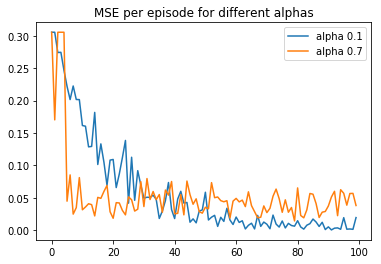

In [5]:
expected = [1/6, 2/6, 3/6, 4/6, 5/6]

errorsa1 = []
errorsa7 = []
for ep in range(100):
    errorsa1.append(sum([(a - b)**2 for a, b in zip(td_zero(0.1, 1, ep), expected)])/len(expected))
    errorsa7.append(sum([(a - b)**2 for a, b in zip(td_zero(0.7, 1, ep), expected)])/len(expected))
    
plt.plot(errorsa1, label="alpha 0.1")
plt.plot(errorsa7, label="alpha 0.7")
plt.legend()
plt.title("MSE per episode for different alphas")
plt.show()

> At the start (low amount of episodes) the higher learning rate seems to give a better result because it learns faster so it needs less amount of episodes to learn. At the end a lower learning rate gives better results as a high learning rate gives too much fluctuation as it also rapidly learns the wrong things sometimes.

### Q2.b  (7 punten)

Plot nu de leercurves voor $\gamma=1$, en $\gamma=0.5$ voor 100 episodes ($\alpha = 0.1$).  Beschrijf hoe de leercurves lopen, en laat ook de uiteindelijke $V$ waardes voor elk model zien.  Wat is het effect van $\gamma$, en hoe ziet de $\gamma=0.5$ robot de wereld (in psychologische termen)? In wat voor een wereld zou dat goed zijn?

Expectations gamma 1:
[0.08195570039847698, 0.22673308886199164, 0.48874502789536284, 0.7032061322701204, 0.8383242732724788]
Expectations gamma 0.5:
[0.0021886074097399403, 0.01082592317182161, 0.0445351482536321, 0.18689894046603459, 0.6511200996708806]


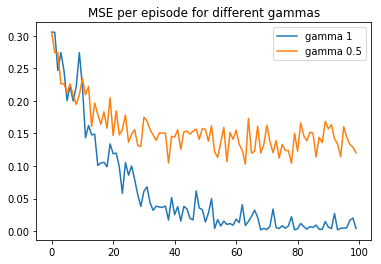

In [6]:
errorsg1 = []
errorsg5 = []
for ep in range(100):
    a_list = td_zero(0.1, 1, ep)
    b_list = td_zero(0.1, 0.5, ep)
    errorsg1.append(sum([(a - b)**2 for a, b in zip(a_list, expected)])/len(expected))
    errorsg5.append(sum([(a - b)**2 for a, b in zip(b_list, expected)])/len(expected))
    
print(f"Expectations gamma 1:\n{a_list}")
print(f"Expectations gamma 0.5:\n{b_list}")
    
plt.plot(errorsg1, label="gamma 1")
plt.plot(errorsg5, label="gamma 0.5")
plt.legend()
plt.title("MSE per episode for different gammas")
plt.show()

> The learning curve of the lower gamma stabalizes at a higher MSE than the learning curve of the higher gamma.

> The effect of gamma is how much the next state counts in the calculation of the new expected value in a certain state. With a lower gamma the next state counts less towards the expected value of the current state. The robot with the lower gamma (0.5) looks less far back while tracing its steps to figure out what actions caused it to gain the reward. This causes the robot to get a smaller expected value for steps that happened further into the past. This is useful in a world where less actions are needed to get rewards (a less complicated world).

## Eligibility traces                                       

![](random_walk_memory.png)

Tot nu toe onthield de robot alleen waar hij een stap geleden was. We breiden nu het geheugen uit en daarmee kan hij langer dingen onthouden, en dus ook waarde toekennen aan states die langer in het verleden liggen. Dit gaat door middel van eligibility traces.  Elke staat die wordt bezocht komt in aanmerking voor een value update zodra er onverwachte uitkomsten zijn. Hoe langer een staat niet bezocht is des te minder deze in aanmerking komt voor een update.

Hoe snel een staat uit het geheugen verdwijnt wordt geregeld via de $\lambda$ parameter:

$$ e_t(s)= \begin{cases}
\gamma \lambda e_{t-1}(s) & if\ s \neq s_t\\
1 & if\ s = s_t \end{cases} $$

Voor replacing traces krijgt de huidige staat waarde 1, en worde alle vorige states in waarde vermindert met eligibility parameter $\lambda$ en discount factor $\gamma$ (beiden getallen tussen 0 en 1).

In het nieuwe model worden dan de verwachte waarde van een alle states (niet alleen de laatste) ge-update met de volgende regel:

$$\Delta V(s) = \alpha \delta e(s)$$

### Q3.a  (7 punten)

Implementeer eligibility traces in het `td_zero` model, en maak er dus `td_lambda` van.  Hiervoor is het nodig om:

* Voor elke episode te beginnen met een lijst met eligibility values (EV), die begint met een eligibility van 0 voor voor alle states (A-E). 
* Deze lijst moet elke stap worden bijgehouden. Elke keer als de robot in een state komt krijgt deze EV = 1, maar hoe langer de robot niet meer in die state komt des te lager de EV wordt.
* Let op! de prediction error (PE) moet nu gebruikt worden om alle states up te daten met een eligibility waarde groter dan nul.
* Zorg dat de output van de functie een lijst is van states $V$ en een lijst van eligibility waardes $e$ (een lijst per episode). 


Run de`td_lambda` functie die je net gemaakt hebt met ($\lambda=0.5$) en zonder ($\lambda=0$) eligibility traces voor 1 episode (episodes=1, $\alpha=0.2$, $\gamma=1$). Rapporteer de lijst van values $V$ en de lijst van eligibilities $e$ voor beiden algoritmes. Wat is het verschil en waarom?

In [14]:
def td_lambda(alpha, gamma, lam, ep):
    values = [[0], [0, (0,0)], [0, (0,0)], [0, (0,0)], [0, (0,0)], [0, (0,1)], [0]]
    EV = [0] * (len(values)-2)
    EVS = []
    index = 3
    
    while ep > 0:
        EV = [gamma*lam*x for x in EV]
        EV[index-1] = 1
        a = random.random()
        if a < 0.5:
            index -= 1
            delta = (values[index+1][1][0] + gamma*values[index][0] - values[index+1][0])
            for i in range(len(EV)):
                values[i+1][0] += alpha*delta*EV[i]
        else:
            index += 1
            delta = (values[index-1][1][1] + gamma*values[index][0] - values[index-1][0])
            for i in range(len(EV)):
                values[i+1][0] += alpha*delta*EV[i]
        
        if (index == len(values) - 1):
            index = 3
            ep -= 1
            EVS.append(EV)
            EV = [0] * (len(values)-2)
        if (index == 0):
            index = 3
            ep -= 1
            EVS.append(EV)
            EV = [0] * (len(values)-2)

    return [x[0] for x in values[1:-1]], EVS


In [15]:
results1, EVS1 = td_lambda(0.2, 1, 0.5, 1)
results2, EVS2 = td_lambda(0.2, 1, 0, 1)
print(f"Expectations lambda 0.5:\n{results1}")
print(f"Eligibilities lambda 0.5:\n{EVS1}")
print()
print(f"Expectations lambda 0:\n{results2}")
print(f"Eligibilities lambda 0:\n{EVS2}")

Expectations lambda 0.5:
[0.0, 0.0, 0.0, 0.0, 0.0]
Eligibilities lambda 0.5:
[[1, 0.5, 0.25, 0.00048828125, 0.0]]

Expectations lambda 0:
[0.0, 0.0, 0.0, 0.0, 0.0]
Eligibilities lambda 0:
[[1, 0, 0, 0, 0]]


> The difference between lambda 0.5 and lambda 0 is that for lambda 0 the animal never lays a connection between older steps and the reward. Only the last step gets an expected value because only this step is seen as important for getting the reward. For a lambda higher than 0 older steps are given some importance to getting the reward and thus also get an expected value.

### Q3.b  (7 punten)

Illustreer nu het effect van verschillende waardes van $\lambda$ op de leercurve (wederom uitgedrukt in $MSE$). Run het `td_lambda` model voor 200 episodes voor $\lambda=0.0$, $\lambda=0.5$, en $\lambda=0.9$ (voor alle modelen $\alpha=0.05$ en $\gamma=1$). Beschrijf aan de hand van een *plot* wat het effect van $\lambda$ op leren is.

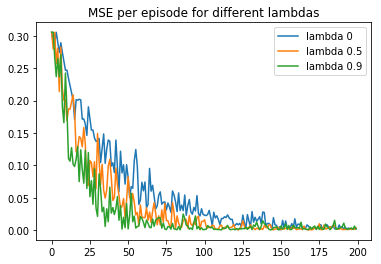

In [16]:
errorsl0 = []
errorsl5 = []
errorsl9 = []
for ep in range(200):
    a_list = td_lambda(0.05, 1, 0, ep)[0]
    b_list = td_lambda(0.05, 1, 0.5, ep)[0]
    c_list = td_lambda(0.05, 1, 0.9, ep)[0]
    errorsl0.append(sum([(a - b)**2 for a, b in zip(a_list, expected)])/len(expected))
    errorsl5.append(sum([(a - b)**2 for a, b in zip(b_list, expected)])/len(expected))
    errorsl9.append(sum([(a - b)**2 for a, b in zip(c_list, expected)])/len(expected))
    
plt.plot(errorsl0, label="lambda 0")
plt.plot(errorsl5, label="lambda 0.5")
plt.plot(errorsl9, label="lambda 0.9")
plt.legend()
plt.title("MSE per episode for different lambdas")
plt.show()

> A higher lambda seems to increase the learning speed. The minimum value of the MSE occurs relatively early, after which the MSE stabilises around a certain value.

## Prediction Errors

Net als bij RW spelen voorspellingsfouten (prediction errors; PE) een grote rol in het TD leer proces. De dynamiek van de prediction errors is bij TD heel specifiek en ze veranderen niet alleen in grote, maar ook wanneer ze plaatsvinden. De prediction error speelde al een rol in de vorige TD functies maar in deze opdracht kijken we er in meer detail naar:

$$PE = [r_{t+1} + \gamma V(s_{t+1}) – V(s_t)]$$


### Woestijn wandeling

We gaan de dynamiek van de prediction error in kaart brengen voor het volgende Markov Reward Process (*MRP*). Dit keer loopt de robot door de woestijn, daar komt er telkens op onverwachte momenten een groene robot voorbijvliegen (*S1*). Telkens als de groene robot voorbijvliegt gooit hij een muntje naar beneden. Het duurt precies 4 seconden voor dat het muntje in de handen van de blauwe robot valt (*S5*). Zodra hij het muntje opgevangen heeft loopt hij door. __Het muntje is 10 punten waard__. 

![](desert_walk.png)

![](desert_walk_states.png)

Pas de vorige `td_zero` functie aan en schrijf een nieuwe functie `td_zero_coin` voor deze *MRP*. Zorg hierbij dat de prediction errors $PE$ ook worden opgeslagen en gereturned, samen met lijst values $V$. Denk eraan dat de eerste prediction error hoort bij het onverwachts voorbijvliegen van de groene robot op *S1*, daarvoor is de robot altijd in state zero (*S0*) en die heeft *altijd* verwachte waarde 0; de robot loopt door woestijn en verwacht dat er nooit iets gaat gebeuren (dit moet je expliciet in je functie opnemen). Zorg dat de output van de functie een lijst is van states $V$ en een lijst van $PE$ (een lijst per episode). 

$$PE = [R_{1} + \gamma V(S1_{1}) – V(S0_0)]$$

Gebruik de nieuwe `td_zero_coin` functie nu om het leren te simuleren van een robot met $\alpha = 0.1$ en $\gamma = 1$.

### Q4.a  (8 punten)

Plot de $V$ van elke staat na 1 leer episode (een keer voorbijvliegen van de robot), voeg ook de $PE$s toe aan de grafiek. Gebruik een [barplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html) voor de $PE$s, en voeg dan $V$ als een normale lijn.


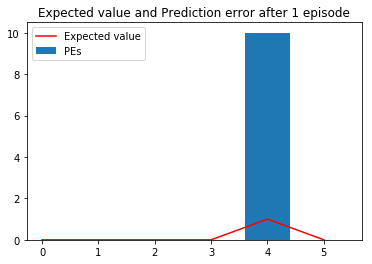

In [10]:
def td_zero_coin(alpha, gamma, ep, coin=False):
    if coin:
        ep2 = ep + 1
    else:
        ep2 = ep
    values = [[0,0], [0,0], [0,0], [0,0], [0,0], [0,10]]
    PE = []
    PE_temp = []
    index = 1
    
    while ep2 > 0:
        if index == 4 and ep2 <= 1 and coin:
            r = 0
        else:
            r = values[index+1][1]
        PE_temp.append(abs(r + gamma*values[index + 1][0] - values[index][0]))
        values[index][0] = TD(alpha, gamma, values[index][0], values[index + 1][0], r)
        index += 1
        if (index == len(values) - 1):
            PE_temp.append(0)
            PE.append(PE_temp)
            PE_temp = []
            index = 1
            ep2 -= 1
    return [x[0] for x in values], PE

V, PE = td_zero_coin(0.1, 1, 1)
plt.bar([1,2,3,4,5], PE[0], label="PEs")
plt.plot(V, 'r', label="Expected value")
plt.legend()
plt.title("Expected value and Prediction error after 1 episode")
plt.show()

### Q4.b  (7 punten)

Wat is de waarde van $V$ van staat 1 en staat 4? Waarom?

> The expected value of state one is zero because the robot has not gotten the reward yet when he sees the green robot. In state four the expected value is one because in the next state he got a reward making it believe the previous state (state four) has some influence on getting the reward.

### Q4.c  (7 punten)

De eerst volgende keer dat de groen robot voorbij vliegt, wat zal dan de eerste reactie van de robot zijn?

> The first reaction of the robot will be in state 4 when he starts expecting a reward.

### Q4.d  (7 punten)

Beschrijf en plot de waardes van $V$ en de prediction errors na 10 en 100 episodes. Leg uit wat er gebeurd. Waarom blijft $V(S_5)$ $0$?


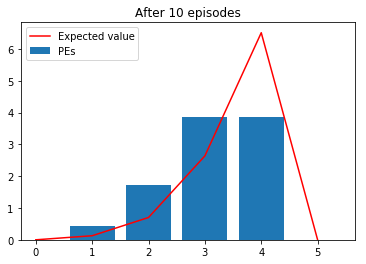

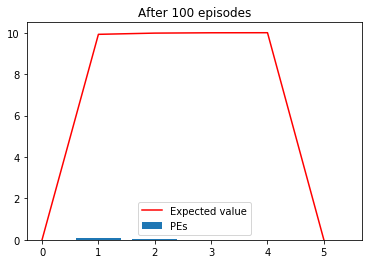

In [11]:
V, PE = td_zero_coin(0.1, 1, 10)
plt.bar([1,2,3,4,5], PE[-1], label="PEs")
plt.plot(V, 'r', label="Expected value")
plt.legend()
plt.title("After 10 episodes")
plt.show()

V, PE = td_zero_coin(0.1, 1, 100)
plt.bar([1,2,3,4,5], PE[-1], label="PEs")
plt.plot(V, 'r', label="Expected value")
plt.legend()
plt.title("After 100 episodes")
plt.show()

> After 10 episodes the robot starts expecting a reward already in state one and the expected value increases up to state 4. After 100 episodes the robot already fully expects the reward in state 1 and the expectation does not increase any more.

> The expected value in state five is zero because in state five he gets the reward so he will not expect anything more (he has no reason to expect anything more).

### Q5.a  (7 punten)

Wat gebeurt er als er na 100 episodes de robot wel weer voorbijvliegt maar nu geen muntje naar beneden gooit? Laat dit ook zien in een grafiek.  Welke signalen in het brein laten eenzelfde patroon zien?

Je kunt hiervoor een nieuwe versie van `td_zero_coin` maken, of je bestaande `td_zero_coin` functie uitbreiden met [default value arguments](https://docs.python.org/3.7/tutorial/controlflow.html#default-argument-values), zodat je code voor *Q4* blijft werken maar je de extra argument voor de optie(s) uit *Q5* kunt gebruiken.


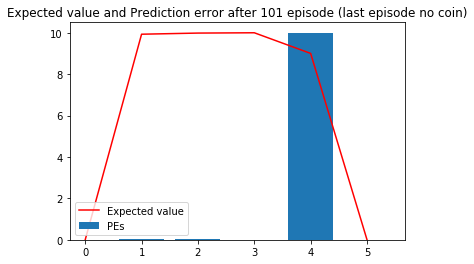

In [12]:
V, PE = td_zero_coin(0.1, 1, 100, True)
plt.bar([1,2,3,4,5], PE[-1], label="PEs")
plt.plot(V, 'r', label="Expected value")
plt.legend()
plt.title("Expected value and Prediction error after 101 episode (last episode no coin)")
plt.show()

> If after 100 episodes the green robot does not drop a coin then the prediction error becomes negative so it learns to less expect a reward. Dopamine neurons show a similar pattern.

### Q5.b  (6 punten)

Noem twee aanpassingen aan het model die ervoor kunnen zorgen dat de robot sneller leert. 

> 1. A higher alpha (learning rate) causes faster learning.

> 2. Using eligibility traces causes faster learning.

### Q5.c  (7 punten)

Stel je nu voor dat de groene robot maar de helft van de tijd (met 50% kans) een muntje naar beneden gooit. Hoe ziet het leren er dan uit. Plot de PE en V grafiek na 100 episodes, let op de absolute waarde van de PE. (run de functie een paar keer om te zien wat er gebeurd als de laatste trial een muntje valt of juist niet).

Ook hiervoor geldt dat je een nieuwe versie van `td_zero_coin` zou kunnen schrijven of extra argument zou kunnen toevoegen. Als je dergelijke extra opties gaat combineren, is het ook nuttig om te kijken naar [keyword arguments](https://docs.python.org/3.7/tutorial/controlflow.html#keyword-arguments).

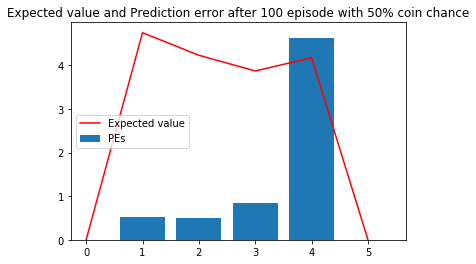

In [13]:
def td_zero_coin_flip(alpha, gamma, ep):
    values = [[0,0], [0,0], [0,0], [0,0], [0,0], [0,10]]
    PE = []
    PE_temp = []
    index = 1
    
    while ep > 0:
        a = random.random()
        if a < 0.5:
            r = 0
        else:
            r = values[index+1][1]
        PE_temp.append(abs(r + gamma*values[index + 1][0] - values[index][0]))
        values[index][0] = TD(alpha, gamma, values[index][0], values[index + 1][0], r)
        index += 1
        if (index == len(values) - 1):
            PE_temp.append(0)
            PE.append(PE_temp)
            PE_temp = []
            index = 1
            ep -= 1
    return [x[0] for x in values], PE

V, PE = td_zero_coin_flip(0.1, 1, 100)
plt.bar([1,2,3,4,5], PE[-1], label="PEs")
plt.plot(V, 'r', label="Expected value")
plt.legend()
plt.title("Expected value and Prediction error after 100 episode with 50% coin chance")
plt.show()

> Since there is a 50% chance for the green robot to drop a coin the expected value will be around 5 (if the reward is 10). During the episodes there will be fluctuation as it might happen that a few times after eachother it will not get a coin or a few times after eachother it will get a coin. If this happens you see a drop or increase in expected value.